<a href="https://colab.research.google.com/github/21skar4/GNR-607-Assignment/blob/main/GNR607_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import libraries
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from math import e
import time
import sys


Enter path of local input /content/Screenshot 2023-12-10 162446.png


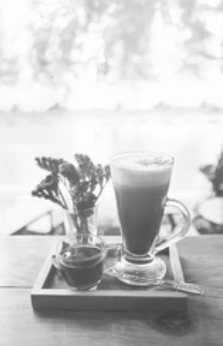

In [ ]:
#@title Loading the image
# Load an color image in grayscale
in_file = input("Enter path of local input " )

image = cv2.imread(in_file,0)
cv2_imshow(image)

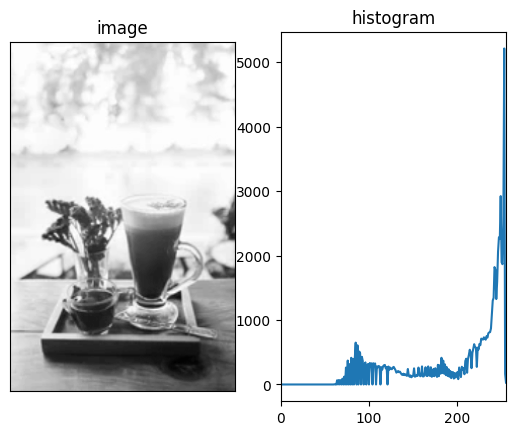

<ipython-input-120-7da381781974>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(image.ravel(),256,[0,255],


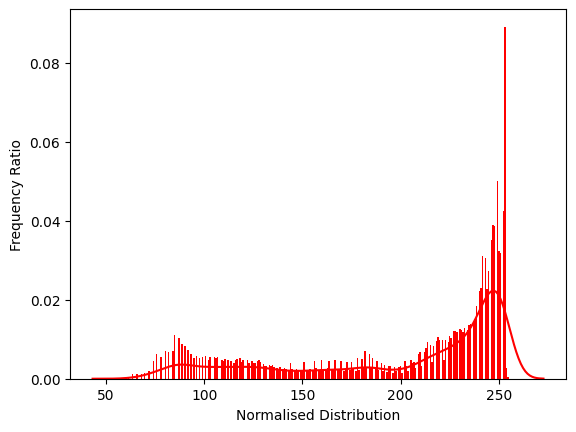

Max_grey_level : 255       Min_grey_level : 61
Rows :  346 Columns :  223


In [ ]:
#@title Histogram , Size and Max , Min greylevel
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
hist,bin = np.histogram(image.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')
plt.show()

# plotting a normalised histogram
ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normalised Distribution', ylabel='Frequency Ratio')

plt.show()


# max and min greylevel
max_grey_level=numpy.max(image)
min_grey_level=numpy.min(image)
print("Max_grey_level :",max_grey_level,"      Min_grey_level :",min_grey_level)

#size of image
rows,columns=image.shape
print("Rows : ",rows,"Columns : ",columns)



In [ ]:
#@title Contrast Enhancement Methods
#Linear Contrast Enchancement with original max and min grey level
#Not suitable when there is a remote pixel with very less frequency of occurance.

def lin_con_enhan1(image,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape
  # m is a slope in the linear contrast enchancement,ie, it represents how much the image is stretched
  m=(max_desired-min_desired)/(max_grey_level-min_grey_level)
  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= m*(image[i,j]-min_grey_level) + min_desired
  # plotting normal distribution for newimage
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  print("m ",m)
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
    # Calculate the Laplacian
  laplacian = cv2.Laplacian(image, cv2.CV_64F)
  newlaplacian = cv2.Laplacian(newimage, cv2.CV_64F)
  # Calculate the variance of the Laplacian
  laplacian_variance = np.var(laplacian)
  newlaplacian_variance = np.var(newlaplacian)

  return print(f'Laplacian Variance Ratio : {newlaplacian_variance/laplacian_variance}')

#Liner Contrast Enhancement2
#Linear contrast enhancement with maximum and minimum being taken at a distance of K x standard deviation from the mean grey level
def lin_con_enhan2(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  mean_grey_level=numpy.mean(image)
  print("Mean grey Level",mean_grey_level)
  standard_deviation=numpy.std(image)
  print("standard_deviation ",standard_deviation)
  max_grey_level=mean_grey_level + k*standard_deviation
  min_grey_level=mean_grey_level - k*standard_deviation
  if  max_grey_level <= max_desired:
    max_grey_level = max_grey_level
  else:
    max_grey_level = max_desired
  if min_desired <= min_grey_level:
    min_grey_level = min_grey_level
  else:
    min_grey_level = min_desired

  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape
  # m is a slope in the linear contrast enchancement,ie, it represents how much the image is stretched
  m=(max_desired-min_desired)/(max_grey_level-min_grey_level)
  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= m*abs(image[i,j]-min_grey_level) + min_desired
      if newimage[i,j] <= min_desired:
        newimage[i,j] = min_desired
      if max_desired <= newimage[i,j]:
        newimage = max_desired
      else:
        newimage[i,j] = newimage[i,j]
  # plotting normal distribution for newimage
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  print("m ",m)
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
    # Calculate the Laplacian
  laplacian = cv2.Laplacian(image, cv2.CV_64F)
  newlaplacian = cv2.Laplacian(newimage, cv2.CV_64F)
  # Calculate the variance of the Laplacian
  laplacian_variance = np.var(laplacian)
  newlaplacian_variance = np.var(newlaplacian)

  return print(f'Laplacian Variance Ratio : {newlaplacian_variance/laplacian_variance}')


  #Log contrast enchancement

def log_con_enhan(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min grey level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape

  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')

  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= (max_desired-min_desired)/numpy.log(1+(max_grey_level/k))*numpy.log(1+(image[i,j]/k))+min_desired
  # plotting normal distribution for newimage
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
    # Calculate the Laplacian
  laplacian = cv2.Laplacian(image, cv2.CV_64F)
  newlaplacian = cv2.Laplacian(newimage, cv2.CV_64F)
  # Calculate the variance of the Laplacian
  laplacian_variance = np.var(laplacian)
  newlaplacian_variance = np.var(newlaplacian)

  return print(f'Laplacian Variance Ratio : {newlaplacian_variance/laplacian_variance}')


  #Exponential contrast enhancement
def exp_con_enhan(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape

  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')

  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= ((max_desired-min_desired)/((np.power(e,(max_grey_level/k)))-1))*((np.power(e,(image[i,j]/k)))-1)+min_desired
  # plotting normal distribution for newimage
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  # Calculate the Laplacian
  laplacian = cv2.Laplacian(image, cv2.CV_64F)
  newlaplacian = cv2.Laplacian(newimage, cv2.CV_64F)
  # Calculate the variance of the Laplacian
  laplacian_variance = np.var(laplacian)
  newlaplacian_variance = np.var(newlaplacian)

  return print(f'Laplacian Variance Ratio : {newlaplacian_variance/laplacian_variance}')

In [ ]:
#@title Choosing the enhancement method
print("Type 1 : For Linear Contrast Enhancement with original max and min.")
print("Type 2 : For Linear Contrast Enhancement with max and min with k deviation from mean.")
print("Type 3 : For Log Contrast Enhancement ")
print("Type 4 : For Exponentail Contrast Enhancement ")
print(" ")
print("Choose Method")
val = int(input())
if val != 1 and val != 2 and val != 3 and val != 4:
  print("You have chosen a wrong value ")
  sys. exit()
print(" ")
print("Choose max desired greylevel between 0 and 255 ")
max_desired = int(input())
if 0 <= max_desired <= 255:
  print("")
else:
  print("You have entered a wrong value")
  sys. exit()
print("Choose min desired greylevel between 0 and 255 ")
min_desired = int(input())
if 0 <= min_desired <= 255:
  print(" ")
else:
  print("You have entered a wrong value")
  sys. exit()


Type 1 : For Linear Contrast Enhancement with original max and min.
Type 2 : For Linear Contrast Enhancement with max and min with k deviation from mean.
Type 3 : For Log Contrast Enhancement 
Type 4 : For Exponentail Contrast Enhancement 
 
Choose Method
1
 
Choose max desired greylevel between 0 and 255 
255

Choose min desired greylevel between 0 and 255 
0
 


<ipython-input-121-946aa89f14f1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(image.ravel(),256,[0,255],


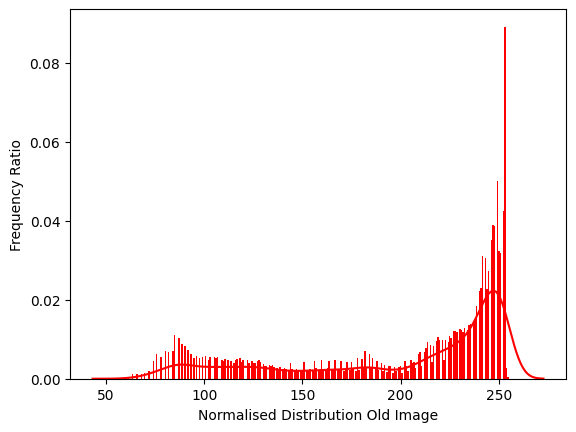

Max_grey_level : 255      Min_grey_level : 61


<ipython-input-121-946aa89f14f1>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newimage.ravel(),256,[0,255],


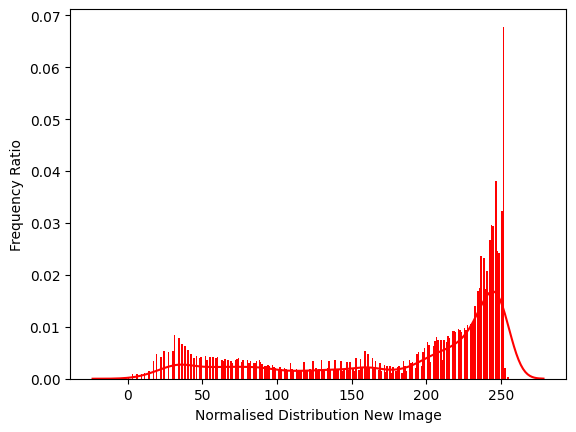

m  1.3144329896907216
New Image data  [[249 251 252 ... 240 230 216]
 [249 251 252 ... 233 220 210]
 [249 251 252 ... 230 218 208]
 ...
 [205 203 202 ...  77  80  81]
 [198 199 201 ...  74  80  82]
 [198 198 199 ...  72  76  81]]


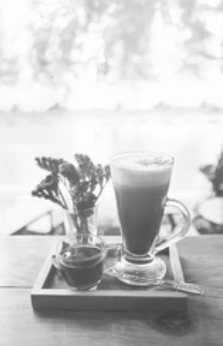

Initial Image


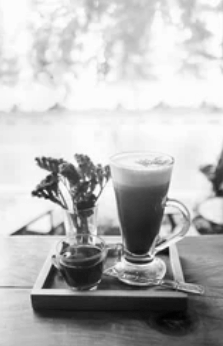

Laplacian Variance Ratio : 1.734134793069561


In [ ]:
#@title Results

if val == 1:
  lin_con_enhan1(image,max_desired,min_desired)
if val == 2:
  lin_con_enhan2(image,8,max_desired,min_desired)

if val == 3:
  print("Choose value between 5-500 for k")
  k1 = int(input())
  if 5 <= k1 <= 500:
    print(" ")
  else:
     print("You have entered a wrong value")
     sys. exit()
  log_con_enhan(image,k1,max_desired,min_desired)

if val == 4:
  print("Choose value between 50 -500 for k")
  k2 = int(input())
  if 50 <= k2 <= 1000:
    print(" ")
  else:
     print("You have entered a wrong value")
     sys. exit()

  exp_con_enhan(image,k2,max_desired,min_desired)

